<center>
<br>
<h1>
    Exploratory Data Analysis - IT 462
</h1>
    <h2>
        Income Tax Data Analysis
    </h2>
<br>
</center>
<table style="font-size: 15px; margin-left:0px;">
    <tr>
    <td>
        <h2>
        Group Number:
        </h2>
    </td>
        <td style="padding-left: 10px">
            <h2>
            17
            </h2>
        </td>
    </tr>
</table>
<h2>
    Team Members:
</h2>
<table style="font-size: 12px; margin-left:0px;">
    <tr>
    <td>
        <h2>
        Manish Prajapati
        </h2>
    </td>
        <td>
            <h2>
            202411012
            </h2>
        </td>
    </tr>
    <tr>
    <td>
        <h2>
        Yash Mehta
        </h2>
    </td>
        <td>
            <h2>
            202201309
            </h2>
        </td>
    </tr>
    <tr>
    <td>
        <h2>
        Bhavish Hiranandani
        </h2>
    </td>
        <td>
            <h2>
            202312070
            </h2>
        </td>
    </tr>
</table>

<h2>
    Datasets taken:
</h2>
    <table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        1.) State/UT wise PANs issues and ITRs filed for FY 2017-18
        </td>
        <td><a href="https://www.data.gov.in/resource/stateut-wise-number-pans-issued-and-income-tax-returns-itr-filed-during-2017-18-ministry">Government of India (data.gov.in)</a>
        </td>
    </tr>
    <tr>
        <td>
        2.) Income Tax Components by Size of Income by Place of Residence: Beginning Tax Year 1999
        </td>
        <td>
            <a href="https://www.data.gov.in/resource/stateut-wise-number-pans-issued-and-income-tax-returns-itr-filed-during-2017-18-ministry">Government of USA (data.gov)
            </a>
        </td>
    </tr>
</table>

<br>
<h2>
    India's Map:
</h2>

<table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        Indian Remote Sensing
        </td>
        <td>
            <a href="https://www.indianremotesensing.com/2017/01/Download-India-shapefile-with-kashmir.html"> Indian Map shape file with Kashmir
            </a>
        </td>
    </tr>
</table>

<br>
<h2>
    GitHub:
</h2>

<table style="margin-left: 0px; font-size: 20px">
    <tr>
        <td>
        GitHub Repository
        </td>
        <td>
            <a href="https://github.com/ManishPraa24/Exploratory-Data-Analysis/tree/main/Project">Exploratory-Data-Analysis Project
            </a>
        </td>
    </tr>
</table>

<h4>
    We have done Data Analysis of above datasets separately. Starting with 'State/UT wise PANs issues and ITRs filed for FY 2017-18'.
</h4>

<h2>
    Pre-requisites:
</h2>

<h3>
    Creating reusable functions for our data-analysis which made our code more readable
</h3>

<h4>
    a.) 'printDashLine' function will print a dash-line, in which you can pass your own symbol
</h4>

In [334]:
def printDashLine(dashes = 20, symbol="-"):
    print(symbol*dashes)

<h4>
    b.) 'printColumnType' function will print the attribute name, dtype of attribute and value type in that attribute
</h4>

In [335]:
def printColumnType(dataset, attribute_list=[], column_width=20, dtype_width=20):

    print(f"{'Column Name'.ljust(column_width)}   {'dtype'.ljust(dtype_width)}   {'Attribute value type'}")
    printDashLine(2*column_width)

    if len(attribute_list)==0:
        attribute_list = dataset.columns

    for x in attribute_list:
        type_of_data = str(state_ut_data[x].dtype)
        type_of_value = str(type(state_ut_data[x][0]))
    
        # Printing meta-data of attribute

        print(f"{x.ljust(column_width)} : {type_of_data.ljust(dtype_width)} : {type_of_value}")

<h4>
    c.) 'printUniqueValues' function will print the unique values of all the categorical attributes of the given dataset (optional: attribute list)
</h4>

In [336]:
def printUniqueValues(dataset, attribute_list=[]):

    if len(attribute_list)==0:
        attribute_list= dataset.dtypes(include=['object', 'categorical']).columns


    print("UNIQUE VALUES")
    printDashLine(50)

    for attr in attribute_list:
        unique_values = dataset[attr].unique()
        print(f"{attr}")
        printDashLine()
        print(f"{unique_values}")
        printDashLine()
        print("Total Unique values: ", len(unique_values))
        print()
        print()

<h4>
    d.) 'printUniqueValueCount' function will count the unique values present in the categorical attributes of the dataset
</h4>

In [337]:
def printUniqueValueCount(dataset, attribute_list=[]):

    
    if len(attribute_list)==0:
        attribute_list= dataset.dtypes(include=['object', 'categorical']).columns

    print("UNIQUE VALUE COUNT")
    printDashLine(50)

    for attr in attribute_list:
        print(f"{attr}")
        printDashLine()
        print(dataset[attr].value_counts())
        print()
        print()
    

<h4>
    e.) 'cleanCategoricalData' function will remove the tuples with the mentioned attributes' values' having a count less than some threshold given. This step will ensure the tuples in the dataset are unambiguous.
</h4>

In [338]:
def cleanCategoricalData(dataFrame, categorical_features=[], feature_name="", feature_value="", threshold_count = 15):

    if feature_name == "":

        if categorical_features==[]:
            categorical_features = dataFrame.dtypes(include=['object', 'categorical']).columns

        for attr in categorical_features:

            cat_counts = dataFrame[attr].value_counts()
            valid_cats = cat_counts[cat_counts >= threshold_count].index

            dataFrame = dataFrame[dataFrame[attr].isin(valid_cats)]

        return dataFrame
        
    else:
        if feature_value=="" and feature_name!="":
            cat_counts = dataFrame[feature_name].value_counts()
            valid_cats = cat_counts[cat_counts >= threshold_count].index

            dataFrame = dataFrame[dataFrame[feature_name].isin(valid_cats)]

            return dataFrame
            
        elif feature_value!="" and feature_name != "":
            dataFrame = dataFrame[dataFrame[feature_name] != feature_value]

            return dataFrame
        else:
            print("No operation performed!")
            return dataFrame

<br>
<h1>
    Data Analysis of State/UT wise PANs issues and ITRs filed for FY 2017-18
</h1>
<br>

<h2>
    1.) Importing Dataset
</h2>
<br>
<h3>
    Importing State/UT wise PANs issues and ITRs filed for FY 2017-18 dataset 
</h3>

In [339]:
# Importing required libraries

# Pandas for framing DataFrame of csv files,
# meta-data, data-cleaning, etc.
import pandas as pd

# Matplotlib for visualization
# Helpful for creating subplots
# and adjusting figure size
import matplotlib.pyplot as plt

# Seaborn for visualization
import seaborn as sns

# geopandas for working with maps and spatial data
import geopandas as gpd

# BytesIO for reading the byte file
from io import BytesIO

# requests for requesting the file
import requests

# importing os for performing file create/delete operations
import os

# tempfile is used for creating temporary files and folders during runtime
import tempfile

# MinMaxScaler for normalizing the values between minimum and maximum
from sklearn.preprocessing import MinMaxScaler


In [340]:
# Initializing URL of the state/UT dataset

state_ut_data_url = r"https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Datasets/India-Pan-Issues-ITRs.csv"

In [341]:
# Importing Dataset

state_ut_data = pd.read_csv(state_ut_data_url)

In [342]:
state_ut_data.head(7)

,Sr.,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
0,1,Andaman & Nicobar Islands,203802,27267
1,2,Andhra Pradesh,19576371,4059895
2,3,Arunachal Pradesh,367698,21650
3,4,Assam,13846678,791450
4,5,Bihar,20884280,1967639
5,6,Chandigarh,828641,308423
6,7,Chhattisgarh,5235846,962594


<br>
<h3>
    Importing Indian map shape file
</h3>
<br>

In [343]:
# Initializing Map's URL

# map_url = r"https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shp"

urls = {
    'shp': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shp',
    'shx': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.shx',
    'dbf': r'https://raw.githubusercontent.com/ManishPraa24/Exploratory-Data-Analysis/refs/heads/main/Project/Shape Files/india_st.dbf'
}

<h3>
    Shapefiles involve multiple components (.shx, .dbf, etc.) and rely on filenames rather than purely memory streams. Hence, we will need to save the shape file temporarily.
</h3>

In [344]:
# Downloading India Map shape file and storing it the memory temporarily

response = requests.get(map_url)

# Below is the code that we tried but failed to do so because of the above reason

# print(BytesIO(response.content))

# if response.status_code ==200:
#     india_map = gpd.read(response.content)
# else:
#     print(f"Error fetching the file: {response.status_code}")

# -------------------------------------------------------------------------------

# Using the temporary file saving approach

# if response.status_code == 200:

#     # Save to a temporary file 
#     temp_file = "temp_indian_map.shp"
    
#     with open(temp_file, "wb") as f:
#         f.write(response.content)

#     # Loading the temporarily saved Indian map shape file

#     try:
#         india_map = gpd.read_file(temp_file)
#     finally:
#         # Removing the temporary file
#         os.remove(temp_file)
# else:
#     print(f"Error fetching file: {response.status_code}")

# --------------------------------------------------------------------------------

# In above approach, we came to know that shape file requires different supporting files
# and those supporting files should exist in the same directory as that of shape file
# , hence, including shx, shp and dbf file formats, going for a new approach


with tempfile.TemporaryDirectory() as tmpdir:

    # Donwloading and saving file temporarily

    for ext, url in urls.items():

        response = requests.get(url)

        if response.status_code == 200:
            with open(f"{tmpdir}/india_st.{ext}", "wb") as f:
                f.write(response.content)
        else:
            print(f"Failed to download {url}")

    # Setting temporary shape file's path
    shapefile_path = f"{tmpdir}/india_st.shp"

    # Loading the geo-panda dataframe
    india_map = gpd.read_file(shapefile_path)


In [345]:
india_map.head(7)

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.9624 20.28906,..."


<br>
<h2>
    2.) Exploring the dataset
</h2>
<br>

<h3>
    Checking type of data in each column using '.info()' method
</h3>

In [346]:
state_ut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Sr.                                                     38 non-null     object
 1   Name of state/UT                                        38 non-null     object
 2   Cumulative number of PANs issued up to FY 2017-18       38 non-null     int64 
 3   Number of ITRs (including revised) filed in FY 2017-18  38 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


<h3>
    Knowing statistics of each numerical attribute using '.describe()' method
</h3>

In [347]:
state_ut_data.describe()

,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
count,3.800000e+01,3.800000e+01
mean,1.999523e+07,3.610081e+06
std,6.137510e+07,1.110427e+07
min,1.673500e+04,2.445000e+03
25%,5.818328e+05,5.081350e+04
50%,4.988558e+06,7.456015e+05
75%,1.542372e+07,3.551438e+06
max,3.799094e+08,6.859155e+07


<h3>
    From above statistics, we have in total 38 tuples.
</h3>

<h3>
    Attributes and their value type in dataset:
</h3>

In [348]:
printColumnType(state_ut_data, column_width=60, dtype_width=10)

Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Sr.                                                          : object     : <class 'str'>
Name of state/UT                                             : object     : <class 'str'>
Cumulative number of PANs issued up to FY 2017-18            : int64      : <class 'numpy.int64'>
Number of ITRs (including revised) filed in FY 2017-18       : int64      : <class 'numpy.int64'>


<br>
<h2>
    3.) Data Cleaning
</h2>
<br>

<h3>
    From the source, shape file of India's map is ready to use, hence we will not perform this step on the shape file.
</h3>

<h3>
    Checking for null-values using 'isnull().sum()' method
</h3>
<h4>
    Above method will give us the individual sum of all null/empty values of all the attributes in the dataset
</h4>

In [349]:
state_ut_data.isnull().sum()

Sr.                                                       0
Name of state/UT                                          0
Cumulative number of PANs issued up to FY 2017-18         0
Number of ITRs (including revised) filed in FY 2017-18    0
dtype: int64

<h3>
    From above, as there are NO null values, we will proceed further.
</h3>

<br>
<h2>
    4.) Data Pre-Processing
</h2>
<br>

<h3>
    Separating categorical and numerical attributes using '.select_dtypes' method
</h3>
<h4>
    Specifying the required dtypes to filter out in 'include' parameter, it will return the attributes with only those data-types mentioned
</h4>

In [350]:
# Separating categorical attributes

state_ut_cat_columns = state_ut_data.select_dtypes(include=['object', 'category']).columns

In [351]:
# Separating numerical numerical attributes

state_ut_num_columns = state_ut_data.select_dtypes(include=['number']).columns

In [352]:
printColumnType(state_ut_data, attribute_list=state_ut_cat_columns, column_width=60, dtype_width=10)

print()
print()

printColumnType(state_ut_data, attribute_list=state_ut_num_columns, column_width=60, dtype_width=10)

Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Sr.                                                          : object     : <class 'str'>
Name of state/UT                                             : object     : <class 'str'>


Column Name                                                    dtype        Attribute value type
------------------------------------------------------------------------------------------------------------------------
Cumulative number of PANs issued up to FY 2017-18            : int64      : <class 'numpy.int64'>
Number of ITRs (including revised) filed in FY 2017-18       : int64      : <class 'numpy.int64'>


<h3>
    Knowing about the unique values of every categorical attributes
</h3>

In [353]:
# Printing Unique values

printUniqueValues(state_ut_data, state_ut_cat_columns)

UNIQUE VALUES
--------------------------------------------------
Sr.
--------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' 'Total']
--------------------
Total Unique values:  38


Name of state/UT
--------------------
['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu'
 'Delhi' 'Foreign' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Total']
--------------------
Total Unique values:  38




<h3>
    Now, knowing about the unique value count of each values in the each categorical attribute column
</h3>

In [354]:
printUniqueValueCount(state_ut_data, attribute_list=state_ut_cat_columns)

UNIQUE VALUE COUNT
--------------------------------------------------
Sr.
--------------------
Sr.
1        1
29       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
30       1
2        1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
21       1
20       1
19       1
18       1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
Total    1
Name: count, dtype: int64


Name of state/UT
--------------------
Name of state/UT
Andaman & Nicobar Islands    1
Punjab                       1
Maharashtra                  1
Manipur                      1
Meghalaya                    1
Mizoram                      1
Nagaland                     1
Odisha                       1
Puducherry                   1
Rajasthan                    1
Andhra Pradesh               1
Sikkim                       1
Tamil Nadu                  

<h4>
    Above, from unique value count, it can be seen that 'Sr.' is not adding any significance to the information that dataset is having. Hence, removing that column will be useful for our analysis.
</h4>

In [355]:
# Removing 'Sr.' from the state_ut_data

state_ut_data.drop(['Sr.'], axis=1, inplace=True)

In [356]:
state_ut_data.columns

Index(['Name of state/UT', 'Cumulative number of PANs issued up to FY 2017-18',
       'Number of ITRs (including revised) filed in FY 2017-18'],
      dtype='object')

<h4>
    Also, we don't need the 'total' in our name of state/UT, hence, removing the tuple with 'total' value in 'Name of state/UT'.
</h4>
<br>
<h3>
    This type of cleaning of data is called target cleaning, and in practice, it is usually the subset of data pre-processing. Because, the separating of attributes into categorical and numerical attributes is a Data pre-processing step.
</h3>
<br>

In [357]:
# Removing the 'total' from 'state'

state_ut_data = cleanCategoricalData(state_ut_data, feature_name='Name of state/UT', feature_value="Total")

state_ut_data.tail(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18
30,Sikkim,218067,12550
31,Tamil Nadu,25491651,4613164
32,Telangana,4741269,425655
33,Tripura,919143,76726
34,Uttar Pradesh,47738454,6258870
35,Uttarakhand,3561489,699753
36,West Bengal,31400426,4402652


<br>
<h2>
    5.) Data Transformation
</h2>
<br>

<br>
<h3>
    Now, to plot a map and show the attributes of State/UT data on the map for visualization, the STATE column of india_map and 'Name of state/UT' column of state_ut_data should have same values.
</h3>
<h3>
    Hence, making the values in state_ut_data's 'Name of state/UT' same as 'STATE' of india_map.
</h3>
<br>

In [358]:
# Making the values in state_ut_data's 'Name of state/UT' same as 'STATE'

for i in range(len(india_map['STATE'])):
    
    flag = True

    state = india_map['STATE'][i]

    for j in range(len(state_ut_data['Name of state/UT'])):

        state_2_split = state_ut_data.loc[j, 'Name of state/UT'].split(" ")

        for s_2_split in state_2_split:

            if s_2_split in state.capitalize():
                state_ut_data.loc[j, 'Name of state/UT'] = state
                flag = False
                break

    if flag:
        print(state, "MIS-MATCH")
        

ORISSA MIS-MATCH
PONDICHERRY MIS-MATCH


<h4>
    Above mis-match occurred because of difference of name. In the state_ut_data, Odisha is written instead of ORISSA, and similarly, Puducherry is written instead of 'PONDICHERRY'.
</h4>
<h4>
    Hence, now, manually correcting this mis-match of values (because of very-small dataset, going for manual updation).
</h4>

In [359]:
# Finding the index where 'Name of state/UT' is 'Odisha'
index_odisha = state_ut_data[state_ut_data['Name of state/UT'] == 'Odisha'].index

# Finding the index where 'Name of state/UT' is 'Puducherry'
index_pudu = state_ut_data[state_ut_data['Name of state/UT'] == 'Puducherry'].index

# Updating the value at 'Name of state/UT' where 'Odisha' is written
state_ut_data.loc[index_odisha, 'Name of state/UT'] = "ORISSA"

# Updating the value at 'Name of state/UT' where 'Puducherry' is written
state_ut_data.loc[index_pudu, 'Name of state/UT'] = "PONDICHERRY"


In [360]:
printUniqueValues(state_ut_data, attribute_list=['Name of state/UT'])

UNIQUE VALUES
--------------------------------------------------
Name of state/UT
--------------------
['ANDAMAN AND NICOBAR ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'CHANDIGARH' 'Chhattisgarh' 'DADRA AND NAGAR HAVELI'
 'DAMAN AND DIU' 'DELHI' 'Foreign' 'GOA' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'Jharkhand' 'KARNATAKA' 'KERALA'
 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ORISSA' 'PONDICHERRY' 'PUNJAB' 'RAJASTHAN' 'SIKKIM'
 'TAMIL NADU' 'Telangana' 'TRIPURA' 'UTTAR PRADESH' 'Uttarakhand'
 'WEST BENGAL']
--------------------
Total Unique values:  37




<h4>
    Above, we just changed the values in the 'Name of state/UT'.
</h4>
<h4>
    Now, we will be normalizing the 'Cumulative number of PANs issued up to FY 2017-18' and 'Number of ITRs (including revised) filed in FY 2017-18'.
</h4>

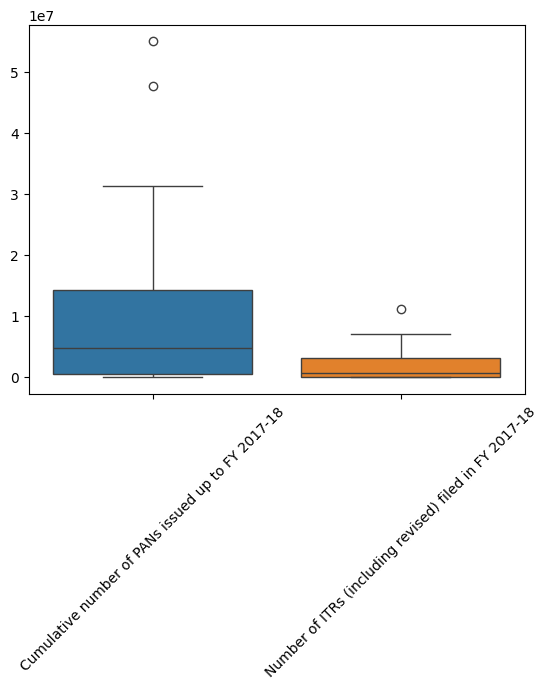

In [361]:
numeric_columns = state_ut_data.select_dtypes(include=['number'])

# Creating the boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.show()

In [362]:
# Initializing the MinMaxScaler()

scaler = MinMaxScaler()

In [363]:
# Normalizing the 'Cumulative number of PANs issued up to FY 2017-18' and 'Number of ITRs (including revised) filed in FY 2017-18'

state_ut_data['Cumulative number of PANs issued up to FY 2017-18 normalized'] = scaler.fit_transform(state_ut_data[['Cumulative number of PANs issued up to FY 2017-18']])

state_ut_data['Number of ITRs (including revised) filed in FY 2017-18 normalized'] = scaler.fit_transform(state_ut_data[['Number of ITRs (including revised) filed in FY 2017-18']])

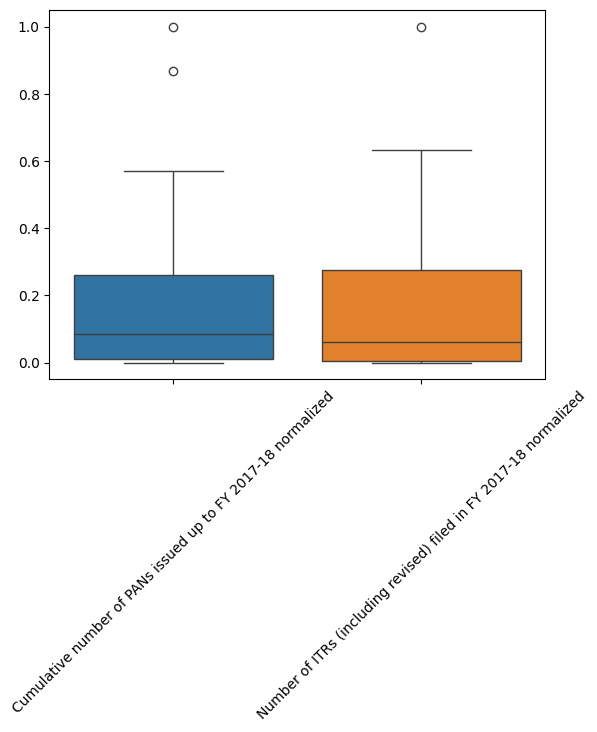

In [364]:
# Creating box plot for normalized numeric columns

numeric_columns = state_ut_data[['Cumulative number of PANs issued up to FY 2017-18 normalized', 'Number of ITRs (including revised) filed in FY 2017-18 normalized']]
# Creating the boxplot
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.show()

<h4>
    Above, the normalized values didn't made any significance difference in the removal of outliers. And, we cannot go for Standardization as the nature of this dataset is to use stats for visualization.
</h4>

<br>
<h3>
    Creating a new metric called 'Percent of ITRs per PAN holder' in order to get the idea that how many ITRs are being filed per PAN card holder (in percentage)
</h3>
<br>

In [365]:
# Creating a new metric named 'Percent of ITRs per PAN holder'
# The more is better

state_ut_data['Percent of ITRs per PAN holder'] = (state_ut_data['Number of ITRs (including revised) filed in FY 2017-18']/state_ut_data['Cumulative number of PANs issued up to FY 2017-18'])*100

In [366]:
state_ut_data.head(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder
0,ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162
1,ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752
2,ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984
3,ASSAM,13846678,791450,0.251312,0.070630,5.715811
4,BIHAR,20884280,1967639,0.379197,0.175919,9.421627
5,CHANDIGARH,828641,308423,0.014754,0.027390,37.220340
6,Chhattisgarh,5235846,962594,0.094840,0.085950,18.384689


In [367]:
state_ut_data['Percent of ITRs per PAN holder normalized'] = (state_ut_data['Number of ITRs (including revised) filed in FY 2017-18 normalized']/state_ut_data['Cumulative number of PANs issued up to FY 2017-18 normalized'])*100

In [368]:
state_ut_data.head(7)

,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder,Percent of ITRs per PAN holder normalized
0,ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162,65.366372
1,ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752,102.189718
2,ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984,26.956765
3,ASSAM,13846678,791450,0.251312,0.070630,5.715811,28.104390
4,BIHAR,20884280,1967639,0.379197,0.175919,9.421627,46.392616
5,CHANDIGARH,828641,308423,0.014754,0.027390,37.220340,185.651834
6,Chhattisgarh,5235846,962594,0.094840,0.085950,18.384689,90.626852


<br>
<h2>
    6.) Data Visualization
</h2>
<br>

<h3>
    First, we will join/merge the state_ut_data and india_map inorder to map the states in india_map with correct states in state_ut_data
</h3>

In [371]:
india_data = india_map.merge(state_ut_data, left_on="STATE", right_on = ["Name of state/UT"])

india_data.head(7)

,STATE,geometry,Name of state/UT,Cumulative number of PANs issued up to FY 2017-18,Number of ITRs (including revised) filed in FY 2017-18,Cumulative number of PANs issued up to FY 2017-18 normalized,Number of ITRs (including revised) filed in FY 2017-18 normalized,Percent of ITRs per PAN holder,Percent of ITRs per PAN holder normalized
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",ANDAMAN AND NICOBAR ISLANDS,203802,27267,0.003399,0.002222,13.379162,65.366372
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",ANDHRA PRADESH,19576371,4059895,0.355430,0.363213,20.738752,102.189718
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",ARUNACHAL PRADESH,367698,21650,0.006378,0.001719,5.887984,26.956765
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",ASSAM,13846678,791450,0.251312,0.070630,5.715811,28.104390
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",BIHAR,20884280,1967639,0.379197,0.175919,9.421627,46.392616
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",CHANDIGARH,828641,308423,0.014754,0.027390,37.220340,185.651834
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.9624 20.28906,...",DADRA AND NAGAR HAVELI,214351,34216,0.003591,0.002844,15.962603,79.199707


<h3>
    a. Cumulative number of PANs issued up to FY 2017-18
</h3>

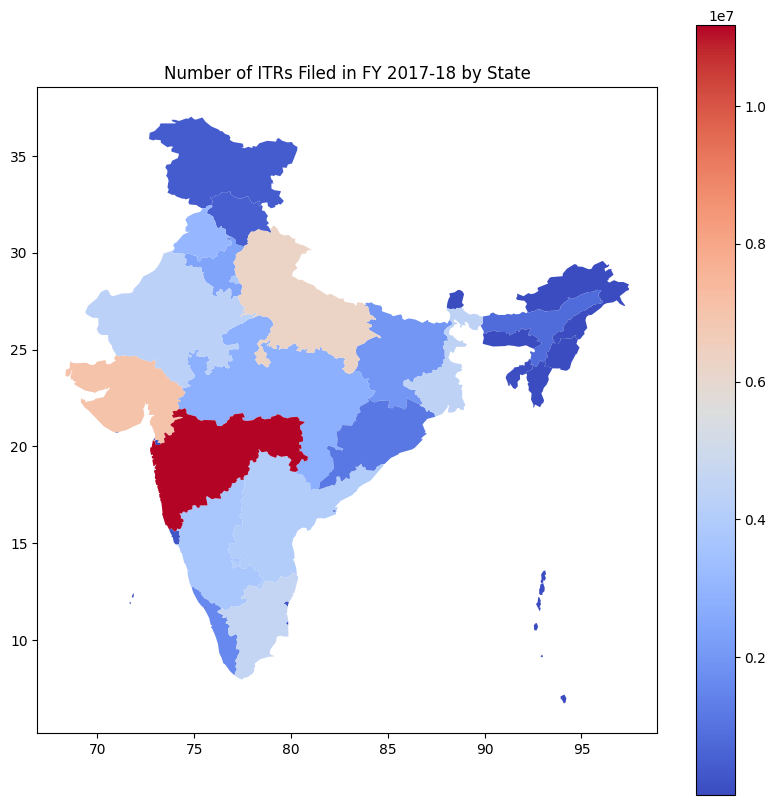

In [372]:
# Plotting India's Map for Number of ITRs filed

india_data.plot(column='Number of ITRs (including revised) filed in FY 2017-18', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Number of ITRs Filed in FY 2017-18 by State")
plt.show()

<h3>
    b. Cumulative number of PANs issued up to FY 2017-18
</h3>

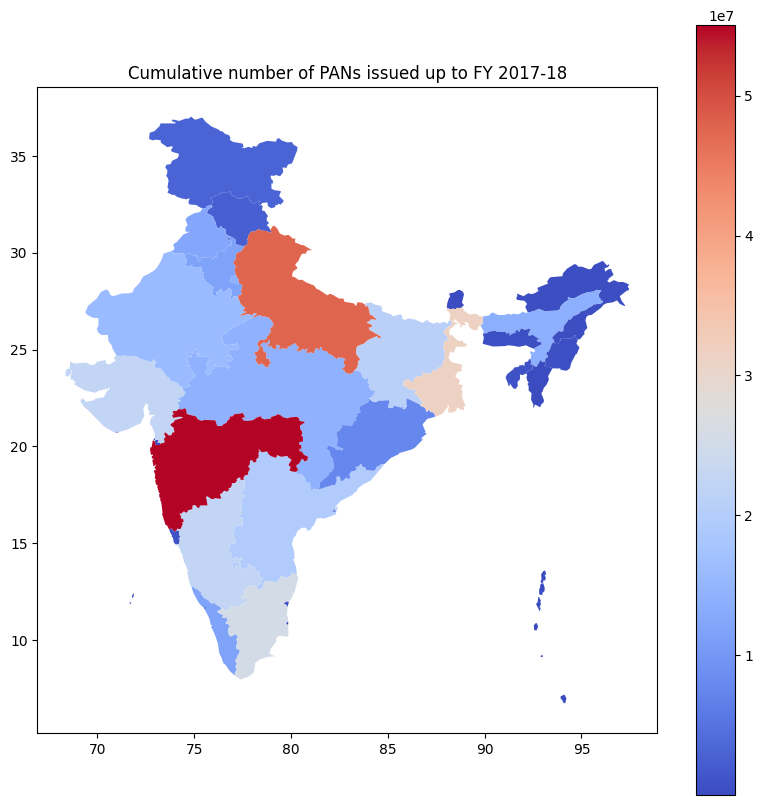

In [373]:
# Plotting India's Map for Cumulative number of PANs issued up to FY 2017-18

india_data.plot(column='Cumulative number of PANs issued up to FY 2017-18', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Cumulative number of PANs issued up to FY 2017-18")
plt.show()

<h3>
    c. Percent of ITRs per PAN holder
</h3>

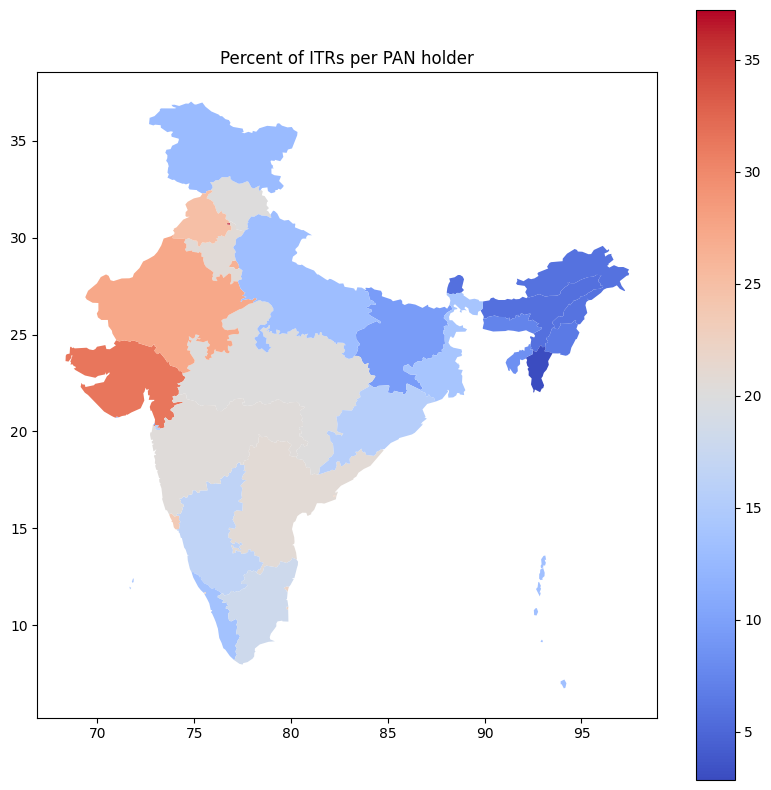

In [374]:
# Plotting India's Map for Percent of ITRs per PAN holder

india_data.plot(column='Percent of ITRs per PAN holder', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title("Percent of ITRs per PAN holder")
plt.show()

<h3>
    d. Correlation matrix of numerical attributes
</h3>

In [385]:
corr_matrix = state_ut_data[['Number of ITRs (including revised) filed in FY 2017-18', 'Cumulative number of PANs issued up to FY 2017-18', 'Percent of ITRs per PAN holder']].corr()

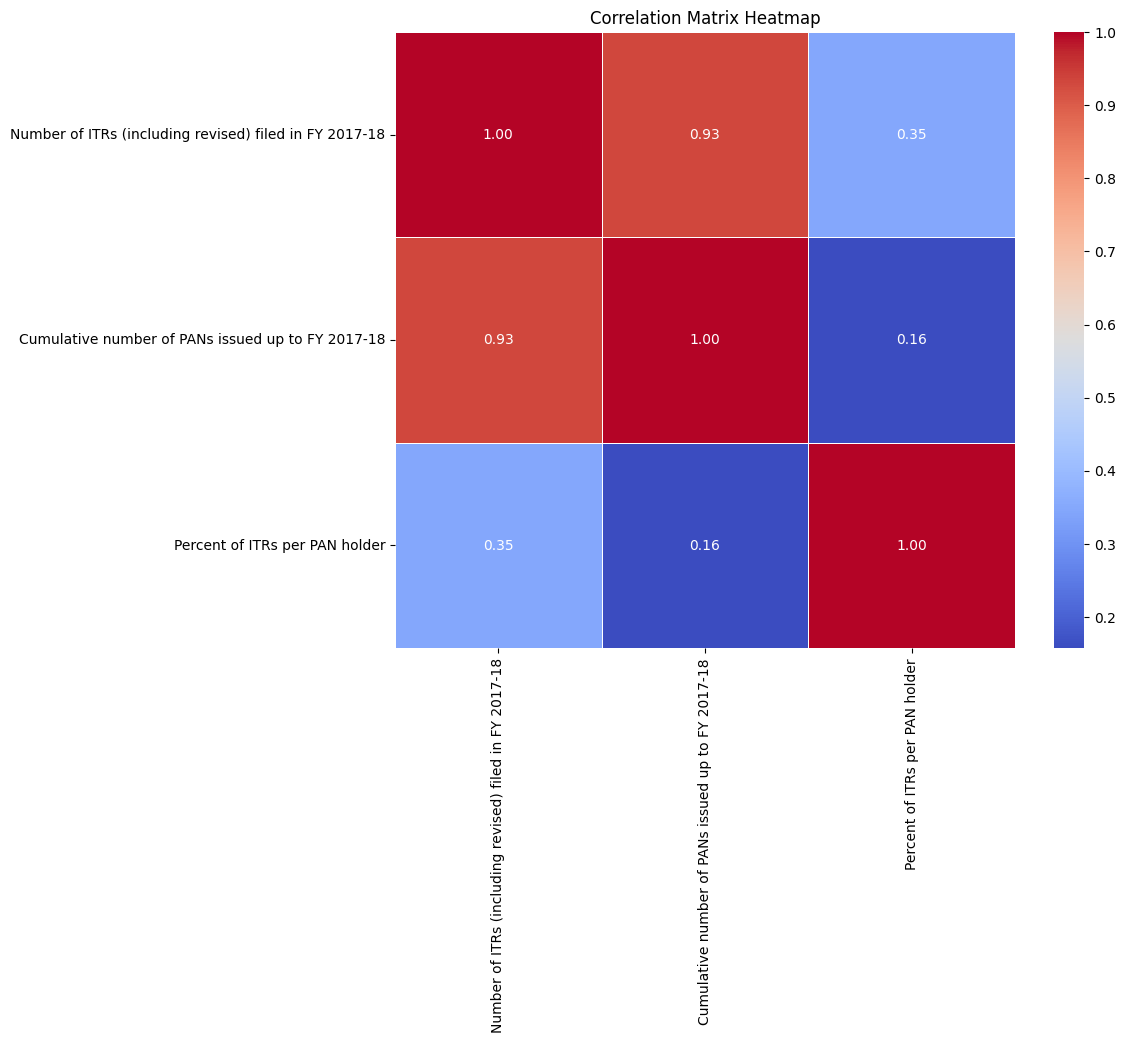

In [386]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

<h3>
    Observations:
</h3>
<ul style="font-size: 18px">
    <li>
        Maharastra is the state with most ITRs filed in FY 2017-18, followed by Gujarat and Uttar Pradesh.
    </li>
    <li>
        Again, Maharastra is the state with most Pancard holders in FY 2017-18, followed by Uttar Pradesh and West Bengal.
    </li>
    <li>
        For Percent of ITRs filed per Pan Card holder, Chandigarh is the place where people are actively filing ITR, followed by Gujarat, Rajasthan, Delhi and Goa.
    </li>
</ul>

<h3>
    Hence, above was the Data Analysis of Indian States ITRs filed and PAN card holders.
</h3>
<br>

<br>
<h1>
    Data Analysis of Income Tax Components by Size of Income by Place of Residence: Beginning Tax Year 1999
</h1>
<br>